In [11]:
import sympy as sp
import numpy as np
import scipy as spy
import random
import matplotlib.pyplot as plt


# Redes Neurais Artificiais 
# Table of Contents

[1. Introdução as redes neurais artificiais](#heading--1)

  * [1.1. Introdução as RNAs](#heading--1-1)
  * [1.2. Perceptrons](#heading--1-2)
  * [1.3. Representação matemática](#heading--1-3)
  * [1.4. Funções de ativação](#heading--1-4)

[2. Algoritmos de aprendizagem](#heading--2)

----
### Introdução as RNAs
<div style="text-align: justify"> A utilização de redes neurais artificiais (RNAs) vem sendo comumente utilizada em diferentes setores de tecnologia, onde algumas caracteristicas como a não linearidade, adaptabilidade e a sua capacidade de implementação em hardware o tornam um grande potencial para ser inerente e tolerânte a falhas. Este notebook trata-se de introduzir o contéudo sobre RNAs contendo alguns algoritmos de aprendizado de máquina que podem implementar uma rede neural artificial MLP. </div>

### Perceptrons 
<div style="text-align: justify"> As RNAs são inspiradas na analogia neurobiológica do cérebro, que é a prova viva de que o processamento paralelo tolerante a falhas não é apenas fisicamente possível, mas também rápido e poderoso, trazendo essa analogia para os algoritmos de aprendizado de máquina temos os neurônios (perceptrons) que é uma unidade de processamento de informações fundamental para a operação de uma rede neural, que formam a base para o projeto de uma grande família de redes neurais artificiais, a função do perceptron é funcionar como um classificador linear (binário). Além disso, é usado na aprendizagem supervisionada e pode ser usado para classificar os dados de entrada fornecidos.</div>
<br/><center>Figura 1 - Modelo não linear de um neurônio, rotulado k</center><br/>

<p align="center">
  <img src="https://i.postimg.cc/xC6GLgKG/arquitetura-perceptron.png"> 
</p>

Alguns elementos importantes que podemos observar são:

**- Sinapses**: Conjunto de sinapses, ou links de conexão, onde cada um e caracterizado com um peso independente, onde o sinal de entrada $x_j$ da sinapse $j$ conectado ao neurônio $k$ e multiplicado pelo peso sináptico $w_{kj}$.
<br/>**- Adder**: Também existe a presença de um somatório que ira somar os sinais de entrada, ponderados pelas respectivas intensidades sinápticas do neurônio, tais operações constituem em uma combinação linear. <br/>
**- Activation function**: Ao final também temos a função de ativação que serve para limitar a amplitude da saída de um neurônio. A função de ativação é conhecida como função de esmagamento, na medida em que comprime (limita) a faixa de amplitue permitida do sinal de saída para algum valor finito. Normalmente, a faixa de amplitude normalizada da saída de um neurônio é escrita como o intervalo de unidade fechada [0,1] ou, alternativamente, [-1,1].

Além desses três itens podemos perceber a existência de um fator externo chamado de tendência (Bias) denotado por $b_k$ ele tem como objetivo aumentar ou diminuir a entrada líquida da função de ativação, dependendo se ela e positiva ou negativa, respectivamente.

### Representação Matemática
Podemos descrever o neurônio k representado na Fig. 1 escrevendo as sequintes equações:

<br/><center> <font size="4"> $$u_k=\sum_{j=1}^{m}w_{kj}x_j$$ </font></center><br/>
<br/><center> <font size="4"> $$y_k=\varphi(u_k + b_k)$$ </font></center><br/>

Onde $x_1, x_2, ... x_m$ são sinais de entrada; $w_1, w_2, ... w_{km}$ são os respectivos pesos sinápticos do neurônio $k$; $u_k$ é a saída do combinador linear devido aos sinais de entrada; $b_k$ como sendo a têndencia, tendo como efeito a transformação afim à saída $u_k$ do combinador linear; $\varphi(\cdot)$ representando a função de ativação e finalmente $y_k$ sendo o resultado de saída do nosso neurônio.

<br/><center> <font size="4">$$v_k=u_k + b_k$$ </font></center><br/>

O $b_k$ é um parâmetro externo do neurônio $k$. de forma equivalente, podemos formular a combinação das equações da seguinte forma:

<br/><center> <font size="4">$$v_k=\sum_{j=0}^{m}w_{kj}x_j$$ </font></center><br/>

### Funções de ativação

As funções de ativação denotada por $\varphi(v)$ podem definir a saída de um neurônio em termos do campo local induzido $v$ podemos encontrar diversos tipos de funções de ativação abaixo encontramos as mais comuns

**Função de limite (Heaviside)**: 
<br/><center> <font size="4"> $$\varphi(v) = \begin{cases} 1, &{v \geq 0} \\ 0, &{v < 0} \end{cases}$$ </font></center><br/>

Esta forma de função de limite é comumente referida como função de Heaviside.Correspondentemente, a saída do neurônio k que pode ser expressa como

<br/><center> <font size="4"> $$y_k = \begin{cases} 1, &{v_k \geq 0} \\ 0, &{v_k < 0} \end{cases}$$ </font></center><br/>

Onde $v_k$ é o campo local induzido do neurônio; isso é,

<br/><center> <font size="4">$$v_k=\sum_{j=1}^{m}w_{kj}x_j + b_k$$ </font></center><br/>


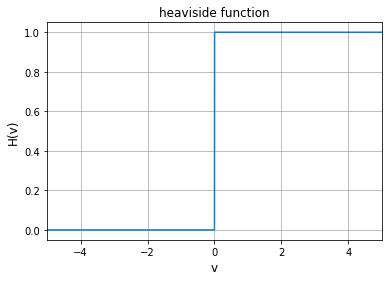

In [12]:
# Heaviside function example
def heaviside(v_signal):
    """
    Função de ativação Heaviside 
    :param v_signal : campo local induzido do neurônio.
    
    :return activFunction: retorna valor 0 ou 1 dependendo do campo local induzido.
    """
    activFunction = np.heaviside(v_signal, 1)
    return activFunction
    
    # Forma alternativa
    # return 1 * (v_signal >= 0) - 1 * (v_signal < 0)

v = np.linspace(-5, 5, 10000)

#plota a função Heaviside
plt.title('heaviside function')
plt.xlabel('v', fontsize=12)
plt.ylabel('H(v)', fontsize=12)
plt.xlim(-5, 5)
plt.plot(v, heaviside(v))
plt.grid()


Na computação neural, esse neurônio é conhecido como o Modelo McCulloch – Pitts, em reconhecimento ao trabalho pioneiro realizado por McCulloch e Pitts (1943). Neste modelo, a saída de um neurônio assume o valor de 1 se o campo local induzido desse neurônio for não negativo e 0, caso contrário. Esta declaração descreve opropriedade tudo ou nada do modelo McCulloch – Pitts.

**Função sgmóid**: A função sigmóide, cujo gráfico é em forma de "S", é de longe a forma mais comum de função de ativação usada na construção de redes neurais. É definido como uma função estritamente crescente que exibe um equilíbrio elegante entre o comportamento linear e não linear. Como exemplo de função linear temos a seguinte função

<br/><center> <font size="4"> $$\varphi(v) = \frac{1}{1 + exp(-av)}$$ </font></center><br/>

<br/>Onde **a** é o parâmetro de inclinação da função sigmoid. Conforme o parâmetro de inclinação se aproxima do infinito, a função sigmóide torna-se simplesmente uma função de limite.<br/> 

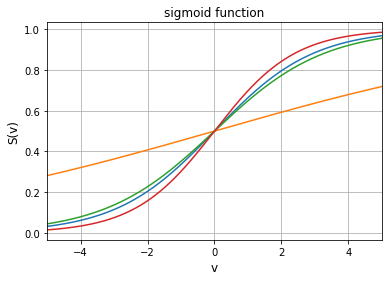

In [13]:
def sigmoid(v_signal, a):
  """
  Função de ativação sigmoid 
  :param v_signal : campo local induzido do neurônio.
  :param a : parâmetro de inclinação da função sigmoid.

  :return activFunction: retorna uma faixa contínua de valores 0 e 1.
  """
  return 1 / (1 + np.exp(-a * v_signal))

def generator():
  """
  Função que gera inteiros aleatórios.
  """
  return random.random()

v = np.linspace(-5, 5, 10000)

#plota as curvas da função sigmóide
plt.title('sigmoid function')
plt.xlabel('v', fontsize=12)
plt.ylabel('S(v)', fontsize=12)
plt.xlim(-5, 5)
plt.plot(v, sigmoid(v, generator()))
plt.plot(v, sigmoid(v, generator()))
plt.plot(v, sigmoid(v, generator()))
plt.plot(v, sigmoid(v, generator()))
plt.grid()


Enquanto uma função de limite assume o valor de 0 ou 1, uma função sigmoid assume uma faixa contínua de valores de 0 a 1. Além disso podemos observar também que o a função sigmoid é diferenciável, enquanto a função de limite não é, onde a caracteristica de ser diferenciável e bastante importante na teoria das redes neurais. 

Outra função bastante útil e a **função signum**, onde algumas vezes e necessário ter a função de ativação na faixa de -1 a 1, caso em que a função de ativação é uma função ímpar do campo local induzido, sendo essa função definida como

<br/><center> <font size="4"> $$\varphi(v) = \begin{cases} 1, &{v > 0} \\ 0, &{v = 0} \\ -1, &{v < 0} \end{cases}$$ </font></center><br/>

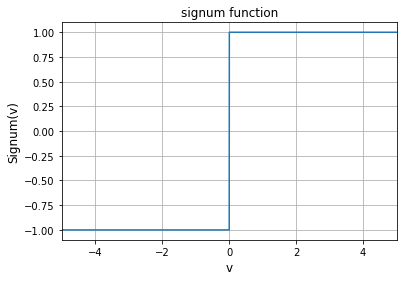

In [14]:
def signum(v_signal):
    """
    Função de ativação signum
    :param v_signal : campo local induzido do neurônio.

    :return activFunction: retorna valores na faixa de -1 e 1.
    """
    activFunction = np.sign(v_signal)
    return activFunction
    

v = np.linspace(-5, 5, 10000)

#plota a curva da função signum
plt.title('signum function')
plt.xlabel('v', fontsize=12)
plt.ylabel('Signum(v)', fontsize=12)
plt.xlim(-5, 5)
plt.plot(v, signum(v))
plt.grid()


Para a forma correspondente de uma função sigmóide, podemos usar o função tangente hiperbólica, definido por

<br/><center> <font size="4"> $$\varphi(v) = tanh(v)$$ </font></center><br/>

Permitir que uma função de ativação do tipo sigmóide assuma valores negativos pode render benefícios práticos satisfatórios. Abaixo temos o plot das funções de ativação mais utilizadas pelos perceptrons.

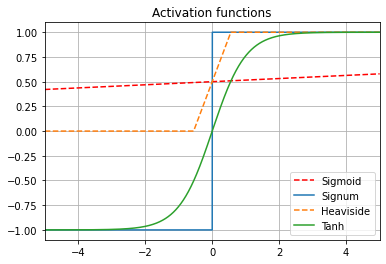

In [15]:
#plota as funções de ativação ja vistas
plt.title('Activation functions')
plt.xlim(-5, 5)

# gera um intervalo
t = np.linspace(-5, 5, 10)

#plot das funções de ativação
plt.plot(v, sigmoid(v, generator()), 'r--', label='Sigmoid')
plt.plot(v, signum(v), label = 'Signum')
plt.plot(t, heaviside(t), '--', label='Heaviside')
plt.plot(v, np.tanh(v), label='Tanh')
plt.legend()
plt.grid()


### Arquitetura de rede

## Referências
[1] Neural networks and learning machines, Simon Haykin.—3rd ed.\ [2] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron Copyright © 2019 Kiwisoft S.A.S. All rights reserved.